In [1]:
import sys
sys.path.insert(0, "../")
from geolipi.symbolic import  *
from sympy import Symbol
from geolipi.languages.primal_csg3d import str_to_expr as primal_str_to_expr
from geolipi.languages.cp_fusion import str_to_expr as cp_str_to_expr
from geolipi.languages.macro_csg3d import str_to_expr as macro_str_to_expr
from geolipi.languages.lat_csg2d import str_to_expr as lat_str_to_expr2d
from geolipi.languages.macro_csg2d import str_to_expr as macro_str_to_expr2d
from geolipi.torch_compute.sketcher import Sketcher
from geolipi.torch_compute.evaluate_sdf import expr_to_sdf
from geolipi.torch_compute.evaluate_color import expr_to_colored_canvas
from geolipi.torch_compute.visualizer import get_figure
from geolipi.symbolic.utils import resolve_macros

import random
import torch as th
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

Difference(
	NoParamRectangle2D(),
	NoParamCircle2D())


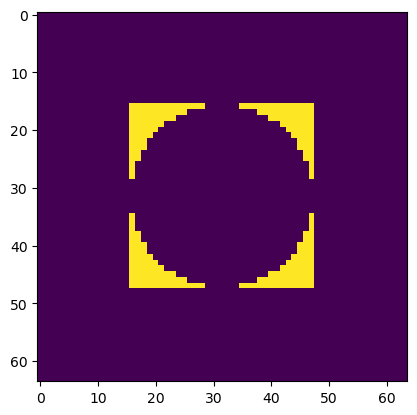

In [15]:
expr = Difference(NoParamRectangle2D(), NoParamCircle2D())
res = 64
sketcher = Sketcher(device="cuda", resolution=res, n_dims=2)
sdf = expr_to_sdf(expr, sketcher=sketcher, rectify_transform=True)
print(expr.pretty_print())
sdf = sdf.cpu().numpy()
occ = sdf < 0
plt.imshow(occ.reshape(res, res, 1))

ColorTree2D(
	TranslationSymmetry2D(
		Scale2D(
			TriangleEquilateral2D(
				tensor([0.5000], device='cuda:0')),
			tensor([0.5000, 0.5000], device='cuda:0')),
		tensor([0.2000, 0.2000], device='cuda:0'),
		3),
	GREEN)


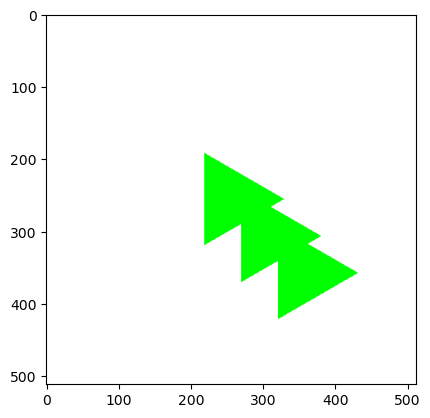

In [14]:

np_var = np.array([0.5])
variable = th.from_numpy(np_var).float().cuda()
expr = Scale2D(TriangleEquilateral2D(variable), th.tensor([0.5, 0.5], dtype=th.float32).cuda())
expr = ColorTree2D(TranslationSymmetry2D(expr, th.tensor([0.2, 0.2], dtype=th.float32).cuda(), 3), Symbol("GREEN"))
print(expr.pretty_print())
res = 512
sketcher = Sketcher(device="cuda", resolution=res, n_dims=2)
sdf = expr_to_colored_canvas(expr, sketcher=sketcher, rectify_transform=True)
sdf = sdf.cpu().numpy()
plt.imshow(sdf.reshape(res, res, 3))


Union(
	ColorTree2D(
		RotationSymmetry2D(
			Translate2D(
				Scale2D(
					TriangleEquilateral2D(
						tensor([0.5000], device='cuda:0')),
					tensor([0.2500, 0.2500], device='cuda:0')),
				tensor([-0.0000, 0.5000], device='cuda:0')),
			tensor([0.7854], device='cuda:0'),
			8),
		YELLOW),
	ColorTree2D(
		Circle2D(
			tensor([0.3000], device='cuda:0')),
		RED))


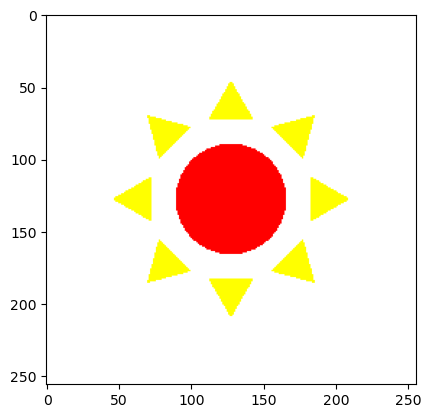

In [13]:

np_var = np.random.uniform(size=(3, 2))
np_var = np.array([[-0.5, -0.5],
                   [0.5, 0.0],
                   [-0.5, 0.5]])
variable = th.from_numpy(np_var).float().cuda()

expr = Triangle2D(variable)

np_var = np.random.uniform(size=(1))
np_var = np.array([0.5])
variable = th.from_numpy(np_var).float().cuda()

expr = Translate2D(TriangleEquilateral2D(variable), th.tensor([0.0, -0.2]).float().cuda())

expr = Translate2D(Scale2D(TriangleEquilateral2D(variable), th.tensor([0.25, 0.25], dtype=th.float32).cuda()),
                     th.tensor([-0.0, 0.5]).float().cuda())
# expr = EulerRotate2D(expr, th.tensor([0.1], dtype=th.float32).cuda())
expr = Union(ColorTree2D(RotationSymmetry2D(expr, th.tensor([np.pi/4], dtype=th.float32).cuda(), 8), Symbol("YELLOW")),
             ColorTree2D(Circle2D(th.tensor([0.3], dtype=th.float32).cuda()), Symbol("RED")))
# expr = resolve_macros(expr, device="cuda")
print(expr.pretty_print())
res = 256
sketcher = Sketcher(device="cuda", resolution=res, n_dims=2)

sdf = expr_to_colored_canvas(expr, sketcher=sketcher, rectify_transform=True)
sdf = sdf.cpu().numpy()
plt.imshow(sdf.reshape(res, res, 3))

In [23]:

expression = ['union',
 'union',
 'cuboid(0.072932, 0.259192, 0.250355, 0.396249, 0.564842, 0.947613)',
 'sphere(-0.387835, -0.052738, -0.209121, 0.632601, 0.928910, 0.704081)',
 'union',
 'cuboid(0.444932, -0.116210, -0.174748, 0.913246, 0.445807, 1.291963)',
 'cuboid(0.371639, -0.159120, -0.181588, 0.985953, 0.902548, 0.323066)']
sketcher = Sketcher(device="cuda", resolution=64, n_dims=3)
parsed_expr = primal_str_to_expr(expression, to_cuda=True)
print(parsed_expr.pretty_print())
parsed_expr = resolve_macros(parsed_expr, device="cuda")

sdf = expr_to_sdf(parsed_expr, sketcher=sketcher, rectify_transform=True)
sdf = sdf.cpu().numpy()

fig = get_figure(sdf, res=64)
fig.show()

Union(
	Union(
		Translate3D(
			Scale3D(
				NoParamCuboid3D(),
				tensor([0.3962, 0.5648, 0.9476], device='cuda:0')),
			tensor([0.0729, 0.2592, 0.2504], device='cuda:0')),
		Translate3D(
			Scale3D(
				NoParamSphere3D(),
				tensor([0.6326, 0.9289, 0.7041], device='cuda:0')),
			tensor([-0.3878, -0.0527, -0.2091], device='cuda:0'))),
	Union(
		Translate3D(
			Scale3D(
				NoParamCuboid3D(),
				tensor([0.9132, 0.4458, 1.2920], device='cuda:0')),
			tensor([ 0.4449, -0.1162, -0.1747], device='cuda:0')),
		Translate3D(
			Scale3D(
				NoParamCuboid3D(),
				tensor([0.9860, 0.9025, 0.3231], device='cuda:0')),
			tensor([ 0.3716, -0.1591, -0.1816], device='cuda:0'))))


In [17]:
parsed_expr = Union(
	ReflectZ3D(
		Scale3D(
			Union(
				Scale3D(
					NoParamCylinder3D(),
					th.tensor([0.7826, 0.7982, 1.2722], device='cuda:0')),
				Scale3D(
					NoParamSphere3D(),
					th.tensor([0.8249, 0.9966, 0.5541], device='cuda:0'))),
			th.tensor([0.7624, 0.9183, 0.8500], device='cuda:0'))),
	Difference(
		Translate3D(
			EulerRotate3D(
				Scale3D(
					NoParamSphere3D(),
					th.tensor([1.0137, 1.0182, 0.9146], device='cuda:0')),
				th.tensor([ 65.9934, -10.7990, -45.7157], device='cuda:0')),
			th.tensor([-0.4137, -0.0442, -0.3042], device='cuda:0')),
		EulerRotate3D(
			NoParamCuboid3D(),
			th.tensor([23.5449, 46.9017, 70.6001], device='cuda:0'))))

sketcher = Sketcher(device="cuda", resolution=64, n_dims=3)
# print(expression)
print(parsed_expr.pretty_print())
# Resolution not required, but can be tested.
# parsed_expr = resolve_macros(parsed_expr, device="cuda")
# print(parsed_expr.pretty_print())

sdf = expr_to_sdf(parsed_expr, sketcher=sketcher, rectify_transform=True)
sdf = sdf.cpu().numpy()

fig = get_figure(sdf, res=64)
fig.show()

Union(
	ReflectZ3D(
		Scale3D(
			Union(
				Scale3D(
					NoParamCylinder3D(),
					tensor([0.7826, 0.7982, 1.2722], device='cuda:0')),
				Scale3D(
					NoParamSphere3D(),
					tensor([0.8249, 0.9966, 0.5541], device='cuda:0'))),
			tensor([0.7624, 0.9183, 0.8500], device='cuda:0'))),
	Difference(
		Translate3D(
			EulerRotate3D(
				Scale3D(
					NoParamSphere3D(),
					tensor([1.0137, 1.0182, 0.9146], device='cuda:0')),
				tensor([ 65.9934, -10.7990, -45.7157], device='cuda:0')),
			tensor([-0.4137, -0.0442, -0.3042], device='cuda:0')),
		EulerRotate3D(
			NoParamCuboid3D(),
			tensor([23.5449, 46.9017, 70.6001], device='cuda:0'))))
